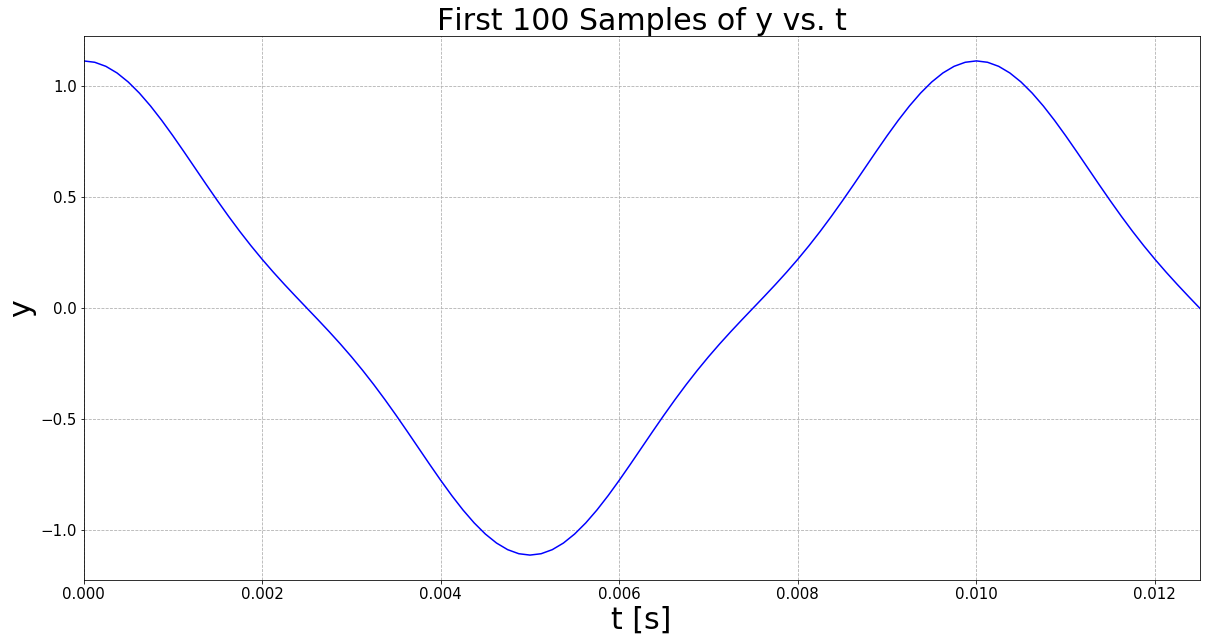

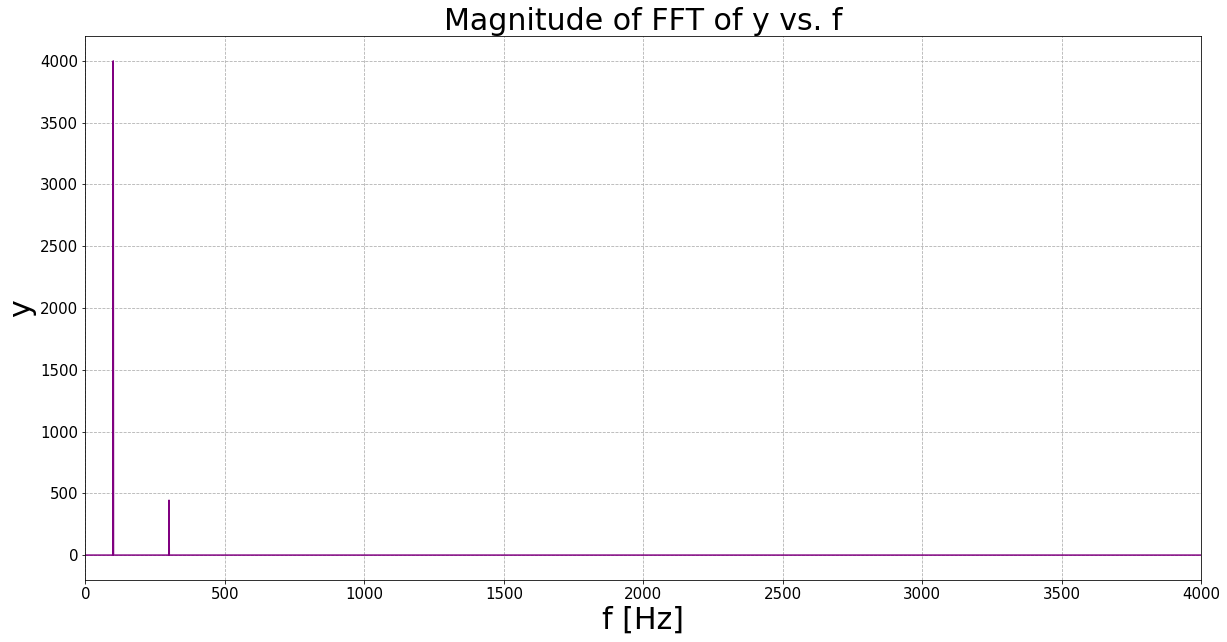

In [69]:
# B. Fourier Series for Triangle Wave

# Import the required modules
import matplotlib.pyplot as plt
import numpy as np

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

# Declare variables given in the lab
fund_f = 100
a = [1, 0, 1/9]
t = np.arange(0, 1, 1/8000)

# Initialize arrays for calculation
y1 = []
y2 = []
y3 = []
y = []

# Obtain all values for each coefficient
for i in range(len(t)):
    value = a[0]*np.cos(2*np.pi*1*fund_f*t[i])
    y1.append(value)
    value = a[1]*np.cos(2*np.pi*2*fund_f*t[i])
    y2.append(value)
    value = a[2]*np.cos(2*np.pi*3*fund_f*t[i])
    y3.append(value)

# Add values together to obtain triangle waveform
y = np.add(np.add(y1, y2), y3)

# Plot triangle waveform and show first 100 samples
plt.figure(figsize=(20,10))
plt.title("First 100 Samples of y vs. t", fontsize=30)
plt.xlim(0, 1/80)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y, color='blue')

# Plot spectrum plot and show only up to 4000 Hz
y = np.fft.fft(y)
mag = np.absolute(y)
f = np.arange(0, 8000-1, 8000/(len(y)+1))
plt.figure(figsize=(20,10))
plt.title("Magnitude of FFT of y vs. f", fontsize=30)
plt.xlim(0, 4000)
plt.xlabel('f [Hz]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(f, mag, color='purple')


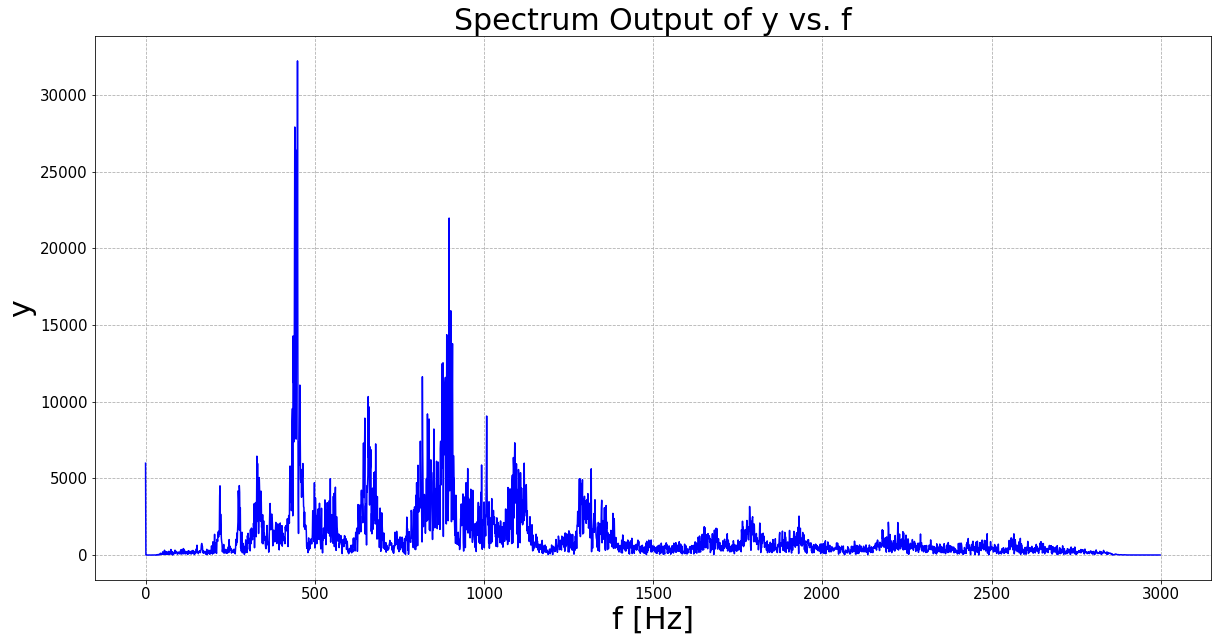

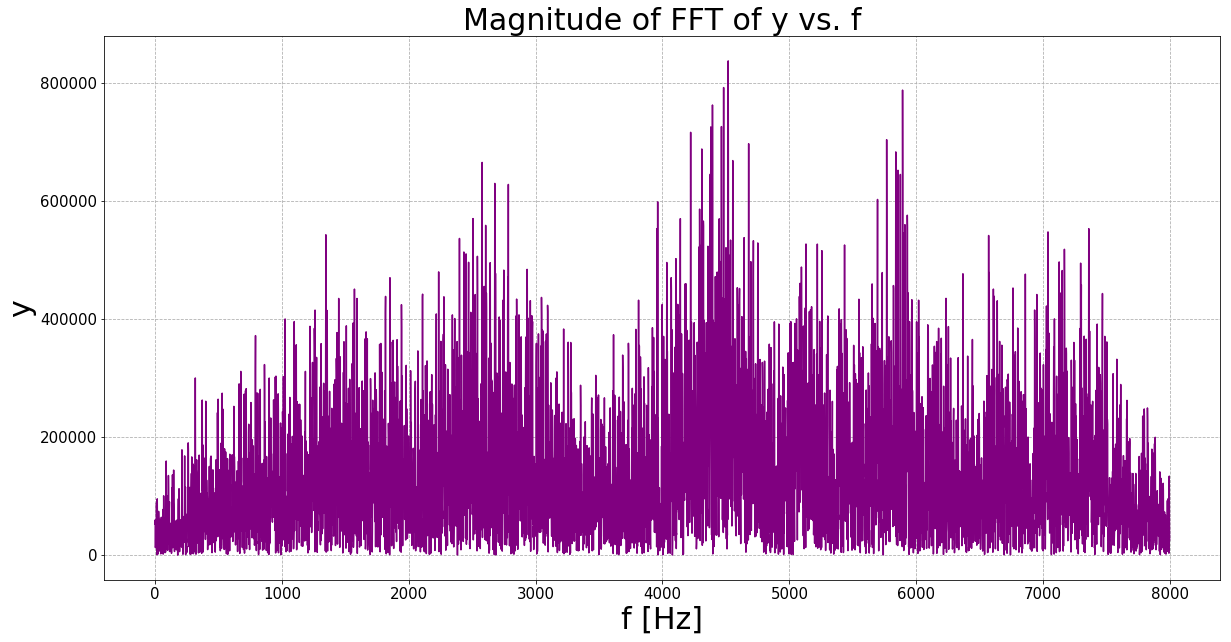

In [70]:
# C. Spectral Analysis of Speech

# Import the required modules
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

# Read in the given sound file
rate, data = wav.read('Downloads/soundfile_8k.wav')

# Source: https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
a = data.T[0]
b=[(ele/2**8.)*2-1 for ele in a]
snippet = b[85000:91000]
c = np.fft.fft(snippet)
d = int(len(c)/2)

# Plot spectrum plot of sound file
plt.figure(figsize=(20,10))
plt.title("Spectrum Output of y vs. f", fontsize=30)
plt.xlabel('f [Hz]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(abs(c[:(d-1)]), color='blue')

# This part of the file most closely resembles the vowel sound "hood" (before listening)
data = np.fft.fft(c)
mag = np.absolute(data)
f = np.arange(0, 8000-2, 8000/(len(data)+1))
plt.figure(figsize=(20,10))
plt.title("Magnitude of FFT of y vs. f", fontsize=30)
plt.xlabel('f [Hz]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(f, mag, color='purple')

# This part of the file most closely resembles the vowel sound "a" (after listening)
# From the English Vowels provided, the closest one to "a" is "had"
wav.write('Downloads/vowel.wav', 8000, np.int16(snippet/np.max(snippet)*32767))


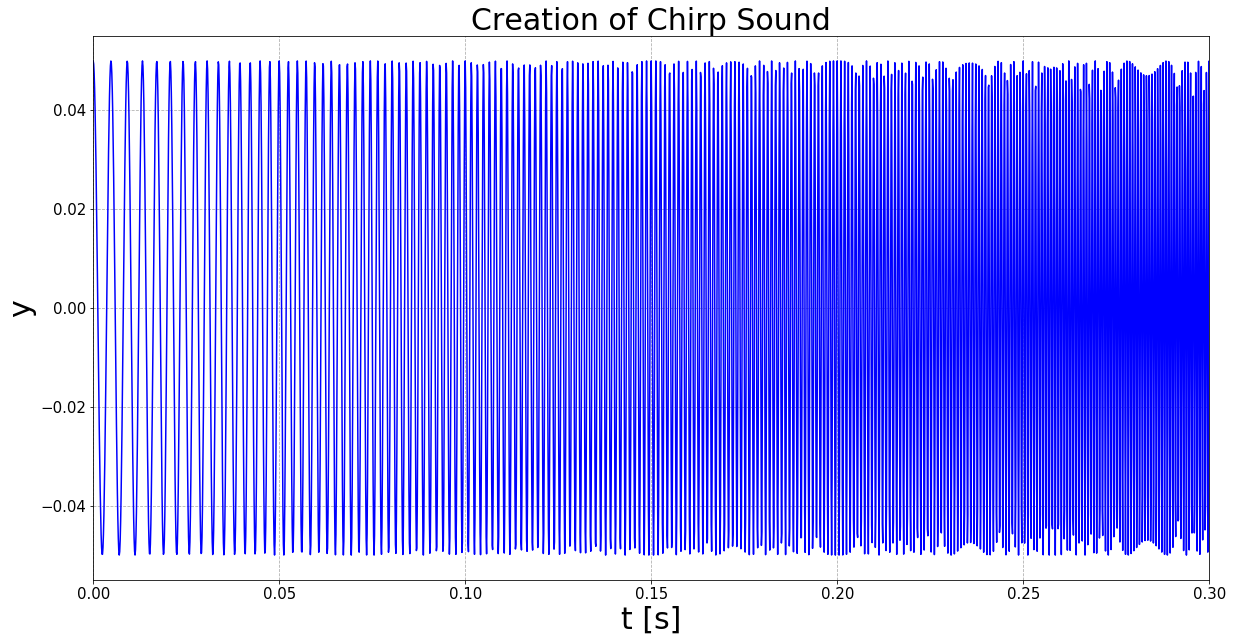

In [71]:
# D. Creation of Chirp Sound

# Import the required modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

# Create time variable and y array
t = np.arange(0, 1, 1/8000)
y = []

# Calculate chirp sound values
for i in range(len(t)):
    time = t[i]
    freq = 200+(2000*time)
    value = (1/20)*np.cos(2*np.pi*freq*time)
    y.append(value)

# Plot chirp sound and cut x-axis to 0.30 to highlight increasing frequency
plt.figure(figsize=(20,10))
plt.title("Creation of Chirp Sound", fontsize=30)
plt.xlim(0, 0.3)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y, color='blue')

# Create sound file exhibiting increasing frequency
wav.write('Downloads/chirp.wav', 8000, np.int16(y/np.max(y)*32767))


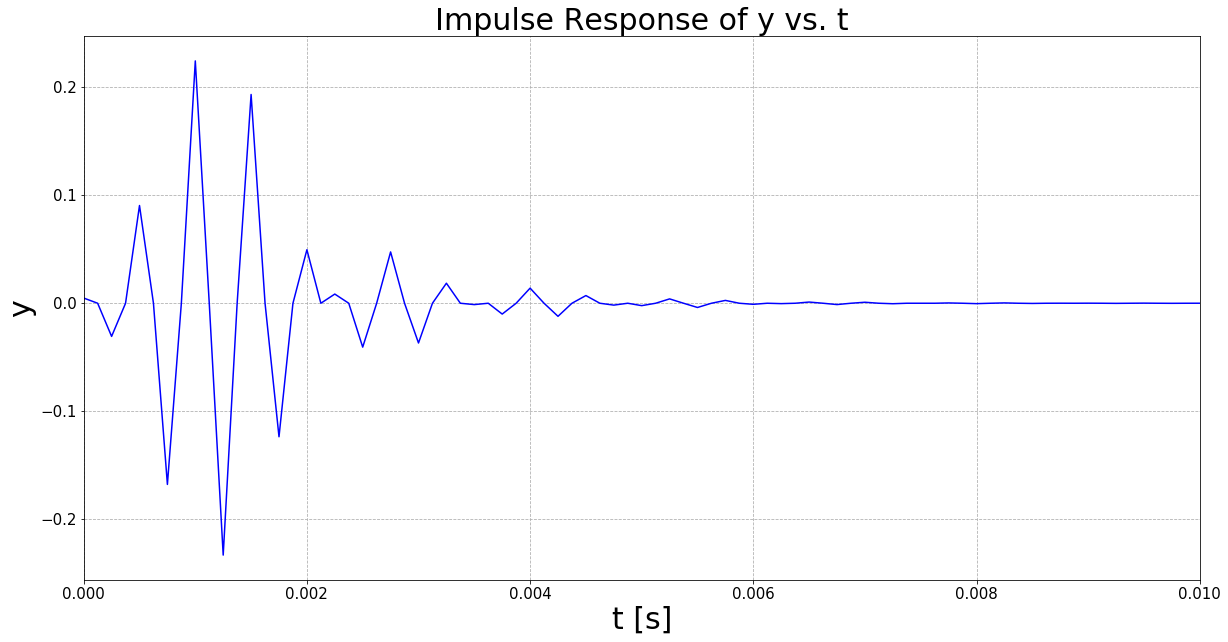

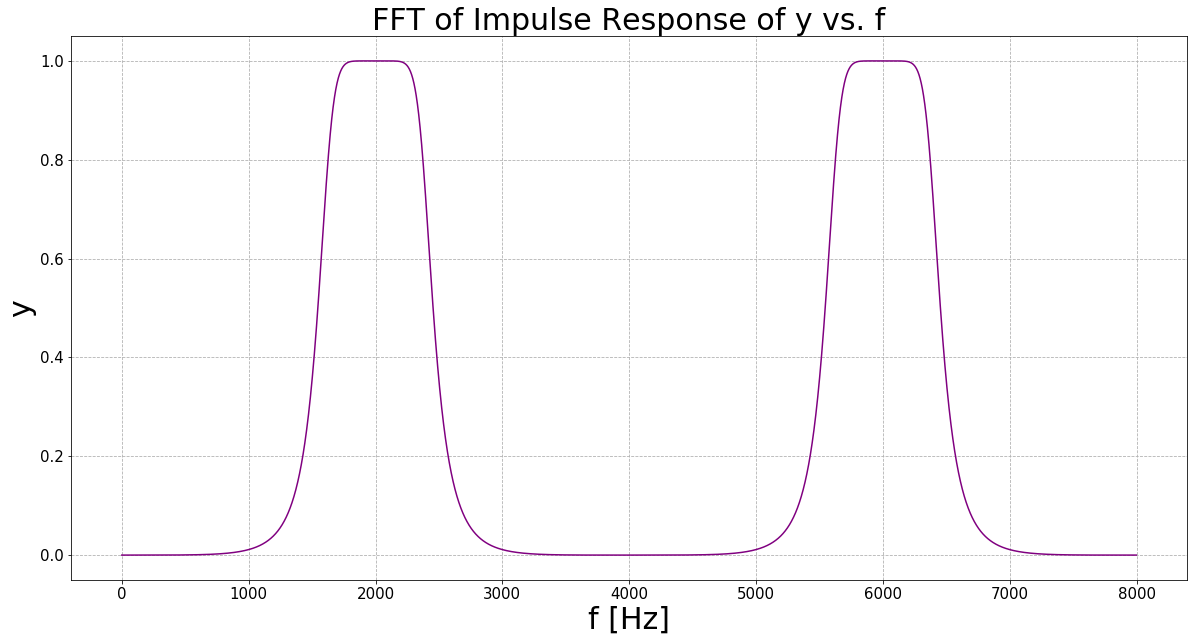

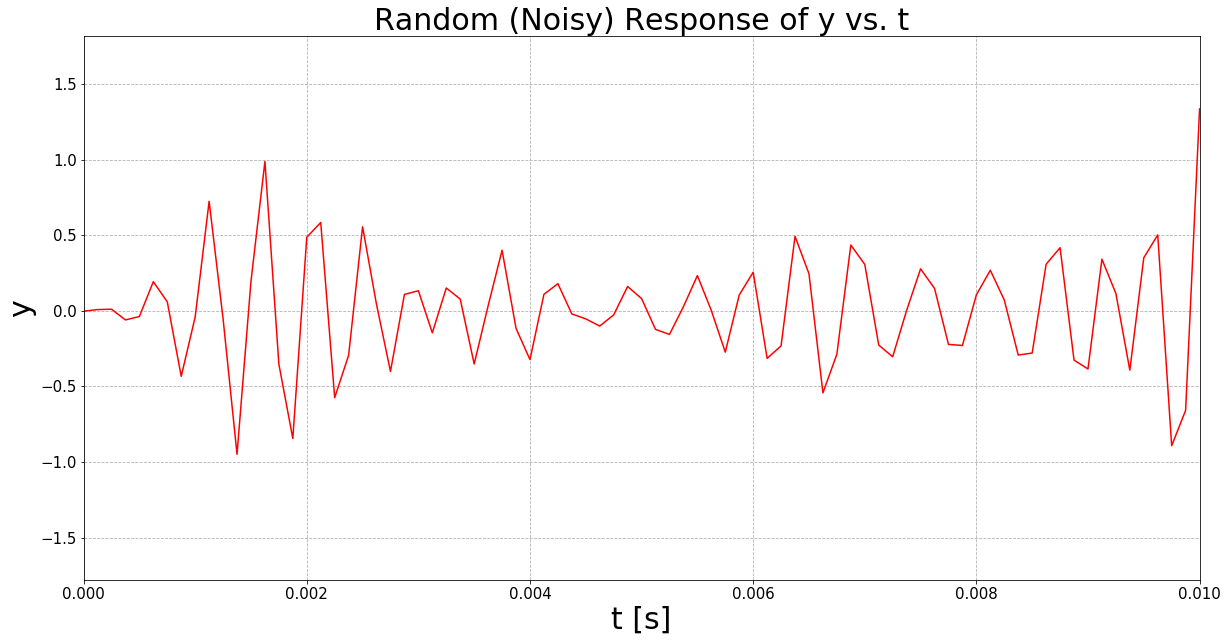

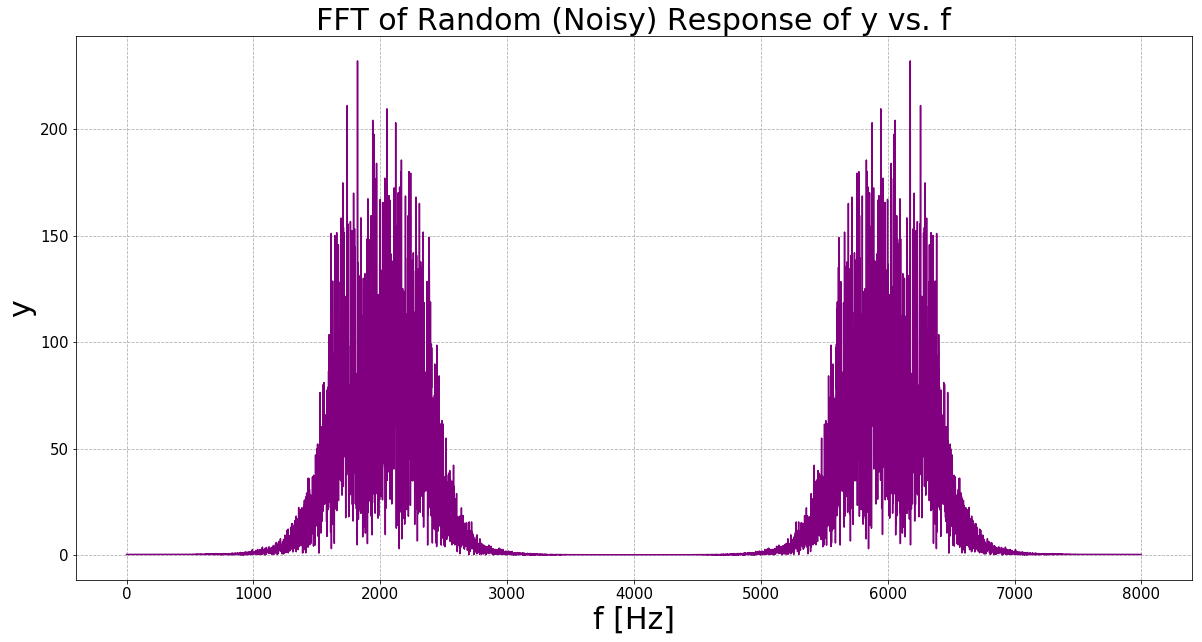

In [73]:
# Import the required modules
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile as wav

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

# Read sound file from part C.
rate, data = wav.read('Downloads/soundfile_8k.wav')

# Source: https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
a = data.T[0]
b=[(ele/2**8.)*2-1 for ele in a]
snippet = b[85000:91000]

# Create 4th-order Butterworth bandpass filter and filter the sound
b, a = signal.butter(4, [0.4,0.6], btype='bandpass')
y = signal.lfilter(b, a, snippet)

# The sound file after filtering sounds more suppressed and neutral compared to the original
# This sound is expected considering the bandpass filter is meant to reduce low and high frequencies
wav.write('Downloads/filter.wav', rate, np.int16(y/np.max(y)*32767))

# Create impulse array and apply Butterworth and filtering
y = [0] * 8000
y[0] = 1
b, a = signal.butter(4, [0.4,0.6], btype='bandpass')
y = signal.lfilter(b, a, y)

# Plot of impulse response
plt.figure(figsize=(20,10))
plt.title("Impulse Response of y vs. t", fontsize=30)
plt.xlim(0, 1/100)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y, color='blue')

# Plot magnitude of FFT of impulse response
y = np.fft.fft(y)
mag = np.absolute(y)
f = np.arange(0, 8000-1, 8000/(len(y)+1))
plt.figure(figsize=(20,10))
plt.title("FFT of Impulse Response of y vs. f", fontsize=30)
plt.xlabel('f [Hz]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(f, mag, color='purple')

# Create random (noisy) array and apply Butterworth and filtering
y = np.random.randn(8000)
b, a = signal.butter(4, [0.4,0.6], btype='bandpass')
y = signal.lfilter(b, a, y)

# Plot of random (noisy) response
plt.figure(figsize=(20,10))
plt.title("Random (Noisy) Response of y vs. t", fontsize=30)
plt.xlim(0, 1/100)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y, color='red')

# Plot magnitude of FFT of random (noisy) response
y = np.fft.fft(y)
mag = np.absolute(y)
f = np.arange(0, 8000-1, 8000/(len(y)+1))
plt.figure(figsize=(20,10))
plt.title("FFT of Random (Noisy) Response of y vs. f", fontsize=30)
plt.xlabel('f [Hz]', fontsize=30)
plt.ylabel("y", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(f, mag, color='purple')
